<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/Korean_Apartment_Average_Sales_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트 설정

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,851 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146374 files and d

In [3]:
# 설치된 나눔 폰트 중 원하는 폰트의 전체 경로 가져오기
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic


# 런타임 다시 시작

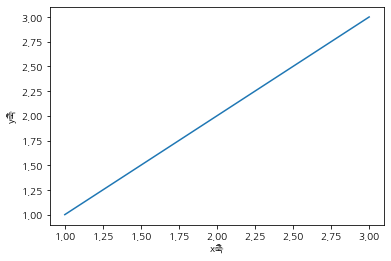

In [1]:
import matplotlib.pyplot as plt

# 한글로 x축, y축 이름 설정하여 그래프 그리기
plt.rc('font', family='NanumGothic')
plt.plot([1,2,3], [1,2,3])
plt.xlabel("x축")
plt.ylabel("y축")
plt.show()

# 마이너스 폰트 깨짐 방지 설정

In [2]:
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Trend of apartment sales price.csv to Trend of apartment sales price.csv


In [5]:
df = pd.read_csv('Trend of apartment sales price.csv', encoding='cp949', index_col=0)
df

,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,2013-11-01,2013-12-01,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,...,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01
지 역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
전국,251459,250134,249292,248895,248952,249460,249330,248705,248058,248189,249144,249657,250066,252332,253063,253977,254180,254179,254207,254273,254646,255658,256639,257252,257685,256960,257770,258966,260724,262134,263642,274990,276080,277359,278709,279746,280443,280494,280335,280234,...,286026,286673,287768,287993,288461,289072,313552,315961,318503,319757,320248,320271,320157,320135,320944,323915,325205,325441,325014,349426,348312,347165,345809,344891,344322,344195,344332,344798,346156,348031,351787,366793,368783,372016,373252,373608,375821,380260,383529,386235
서울,499900,496180,494168,493675,494492,495511,493908,490682,488116,488428,490519,490840,490524,490995,492451,494338,494478,494042,493673,493652,494256,496425,498452,499009,498927,500454,502150,504979,508683,512004,515481,537536,540479,543833,547153,549204,551299,551346,550462,550313,...,576774,579325,582818,582609,584459,587516,659905,673522,686220,691838,693673,694435,694739,695931,702383,716453,720347,719724,717749,810129,806027,802157,799211,797617,797214,798302,799721,801480,807121,813573,827228,877128,877185,876857,873791,870742,871897,881834,886216,888511
경기,263679,262280,261285,261065,261526,261571,260887,260116,260103,261088,261539,262059,264497,265342,266580,266507,266261,266134,266125,266520,267930,269061,269815,270360,270250,271274,272571,274623,276293,277964,287534,288662,289937,291476,292610,293223,293358,293362,293291,293230,...,299812,301247,302000,302598,303176,320920,321896,323802,325231,326362,326840,327185,327297,327732,330735,333158,334458,334469,355541,354658,353599,351599,350168,349317,349249,349695,350665,352063,354143,357767,378093,383242,391027,395275,397329,400898,406661,411193,415139,418927
인천,202523,200792,199521,198613,198803,198975,198906,198652,198262,198428,199825,200720,201236,208264,208972,210232,210733,211004,211121,211299,211647,212331,213001,213614,213870,214626,215182,216256,217981,219230,220569,229480,230134,230948,231698,232615,233204,233304,233258,233324,...,239925,240175,241043,241722,242268,242772,259746,259720,259991,260130,260092,259964,259834,259501,258676,258424,258735,259280,259838,271507,271187,271290,271245,271141,271150,271014,270529,271206,271693,272516,274008,292262,294635,305255,311097,314314,318708,321070,322046,322873
부산,212792,212029,211543,211226,211163,211226,211071,210624,210403,210323,210578,210837,211065,212841,213118,213302,213504,213682,213954,214303,214584,215037,215522,216050,216612,217114,217596,218433,219658,220524,221693,237179,237797,238702,240069,241606,242432,242576,242746,242939,...,257901,258554,259110,259166,259093,258951,295127,294662,294103,293482,292654,291929,290841,289957,288613,287686,286998,286000,284824,286979,286234,285387,284237,283320,282316,281421,280739,280051,279576,280010,282744,293320,293719,293869,293628,293705,294232,297860,301641,305813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [6]:
df.shape

(221, 94)

In [7]:
df.describe()

,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,2013-11-01,2013-12-01,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,...,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.00000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,...,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02
mean,229650.135747,228641.257919,227958.796380,227581.923077,227876.104072,228257.945701,228148.185520,227603.257919,227035.529412,227095.515837,227888.760181,228332.814480,228709.334842,230603.742081,231189.271493,231939.40724,232106.764706,232126.914027,232170.352941,232474.375566,232788.420814,233602.420814,234426.203620,234975.687783,235414.963801,236150.294118,236830.203620,237830.117647,239303.488688,240463.027149,241763.013575,2.536539e+05,2.545982e+05,2.557247e+05,2.568921e+05,2.578435e+05,2.584788e+05,2.585953e+05,2.585484e+05,2.584865e+05,...,2.653444e+05,2.659195e+05,2.668172e+05,2.669769e+05,2.673141e+05,2.678325e+05,2.905509e+05,2.922369e+05,2.943537e+05,2.954813e+05,2.958990e+05,2.959243e+05,2.958607e+05,2.958804e+05,2.965219e+05,2.990191e+05,3.000088e+05,3.000901e+05,2.997459e+05,3.264197e+05,3.254389e+05,3.243656e+05,3.230744e+05,3.221848e+05,3.216262e+05,3.214745e+05,3.216156e+05,3.219915e+05,3.231595e+05,3.247755e+05,3.279756e+05,3.457111e+05,3.473546e+05,3.497791e+05,3.507307e+05,3.509836e+05,3.527735e+05,3.565156e+05,3.592438e+05,3.615114e+05
std,145485.395374,144073.729774,143364.099748,143080.184582,143511.046657,143708.822394,143158.172148,141922.363519,140931.328576,140932.305821,141342.948786,141261.153459,141104.600833,140679.325961,141029.781377,141616.05050,141613.216980,141422.483411,141274.407559,141165.822186,141396.656882,142131.282374,142761.464254,142907.087173,142847.540945,142687.711309,143232.273434,144124.806020,145265.363168,146338.593675,147387.380062,1.537065e+05,1.546120e+05,1.556250e+05,1.566061e+05,1.569809e+05,1.575706e+05,1.575715e+05,1.573236e+05,1.572899e+05,...,1.695659e+05,1.704803e+05,1.718934e+05,1.719740e+05,1.726739e+05,1.738254e+05,2.016360e+05,2.071162e+05,2.129365e+05,2.154195e+05,2.163514e+05,2.168166e+05,2.169653e+05,2.174489e+05,2.200469e+05,2.257797e+05,2.275198e+05,2.275035e+05,2.269342e+05,2.580269e+05,2.564773e+05,2.549983e+05,2.537811e+05,2.532048e+05,2.532683e+05,2.541218e+05,2.551881e+05,2.562287e+05,2.587283e+05,2.616713e+05,2.674232e+05,2.886103e+05,2.888479e+05,2.889093e+05,2.876913e+05,2.863692e+05,2.865111e+05,2.898340e+

# 데이터 정보

- 한국 지역별 아파트 평균매매가격 월별 데이터
- 총 221개의 지역
- 2012년 12월 1일 부터 2020년 9월 1일까지 매달 평균 매매 가격 기록(총 94번)
- 모든 평균 매매 가격은 1000배 축소된 값

# 특정 지역의 아파트 평균매매가격의 추이 분석

In [8]:
location = input("지역을 선택해주세요 : ")

지역을 선택해주세요 : 강남구


In [9]:
select = df.index.str.contains(location)
df_select = df[select]
df_select

,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,2013-11-01,2013-12-01,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,...,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01
지 역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울 강남구,928154,912800,906992,907515,913346,919815,914223,907338,901154,904262,906008,905923,904523,906300,911631,918146,916385,915708,915323,916669,920377,926831,929585,929446,928315,931631,938738,949238,957177,963723,973223,1047077,1055331,1062215,1066931,1061154,1064085,1060831,1058246,1057638,...,1139932,1143568,1152538,1150038,1153644,1163045,1366704,1418398,1454511,1466210,1466237,1463059,1455855,1449339,1460570,1495366,1501737,1502559,1493269,1617961,1600129,1586730,1582011,1580775,1581596,1584787,1589466,1593747,1611242,1630096,1678062,1758527,1755204,1749409,1732086,1714102,1714914,1731527,1738333,1741538


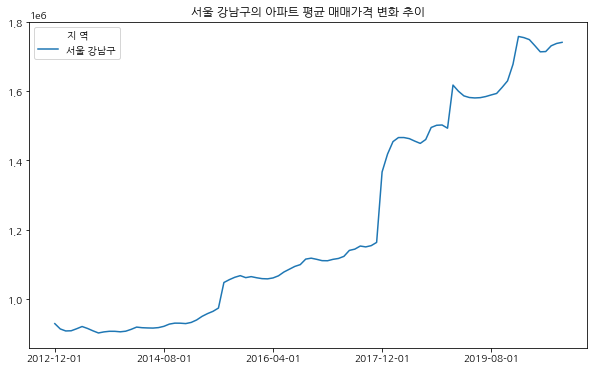

In [58]:
df_select.T.plot(figsize = (10, 6))
plt.title("서울 강남구의 아파트 평균 매매가격 변화 추이")
plt.show()

# 2015년 1월 1일 대비 각 지역들의 아파트 평균매매가격의 변화 분석

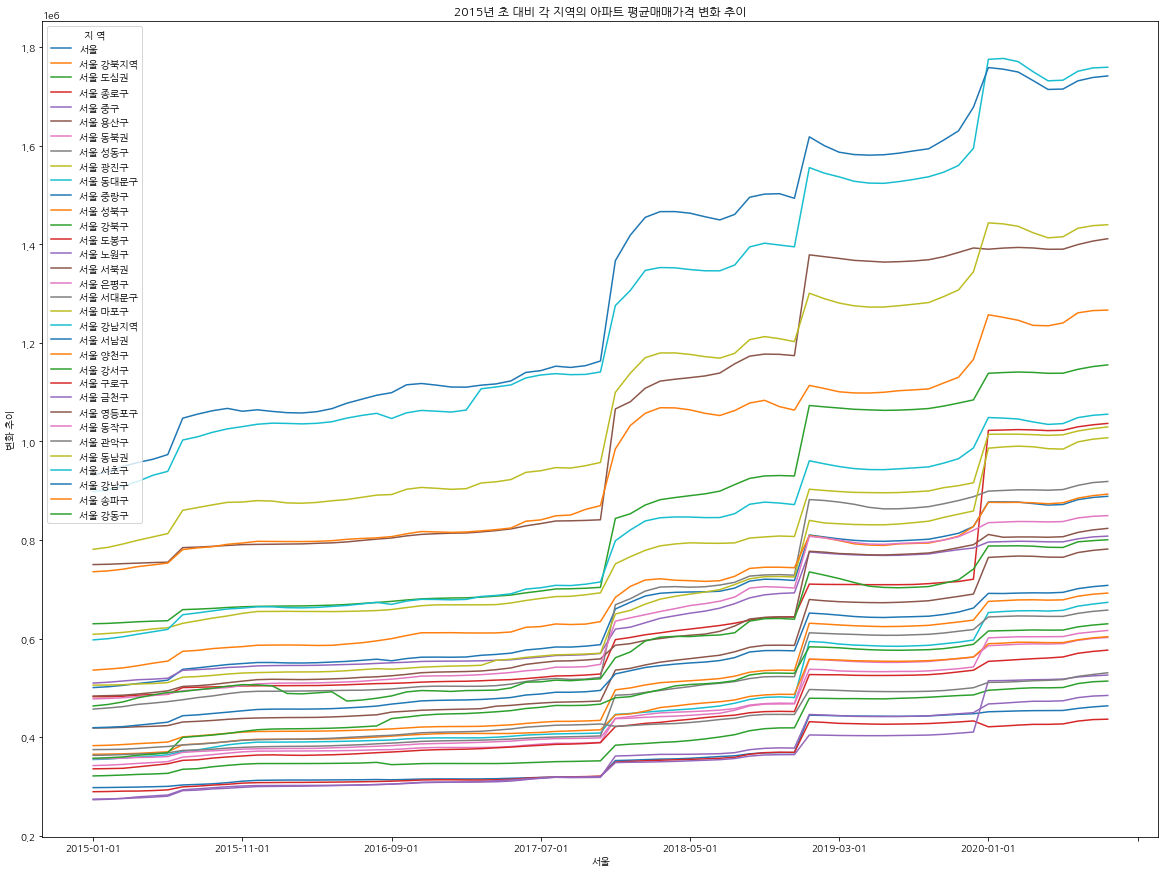

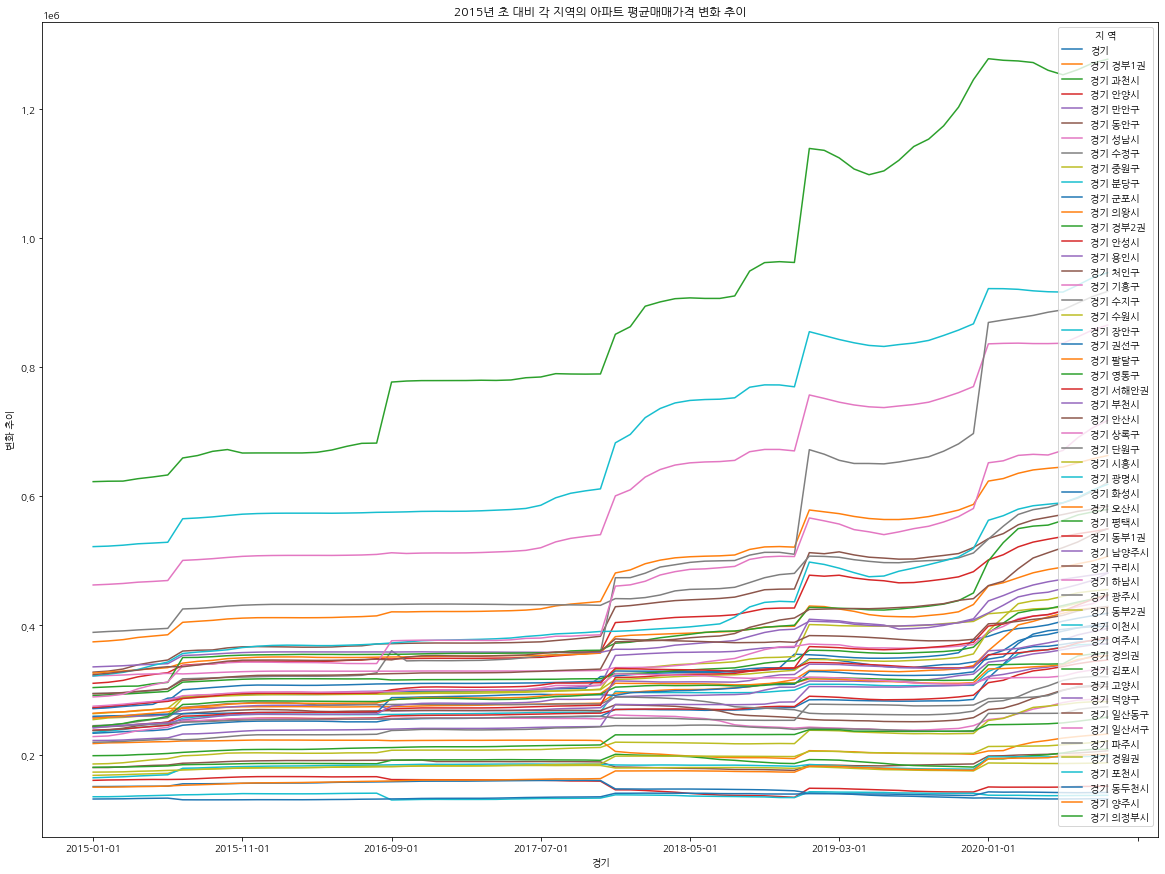

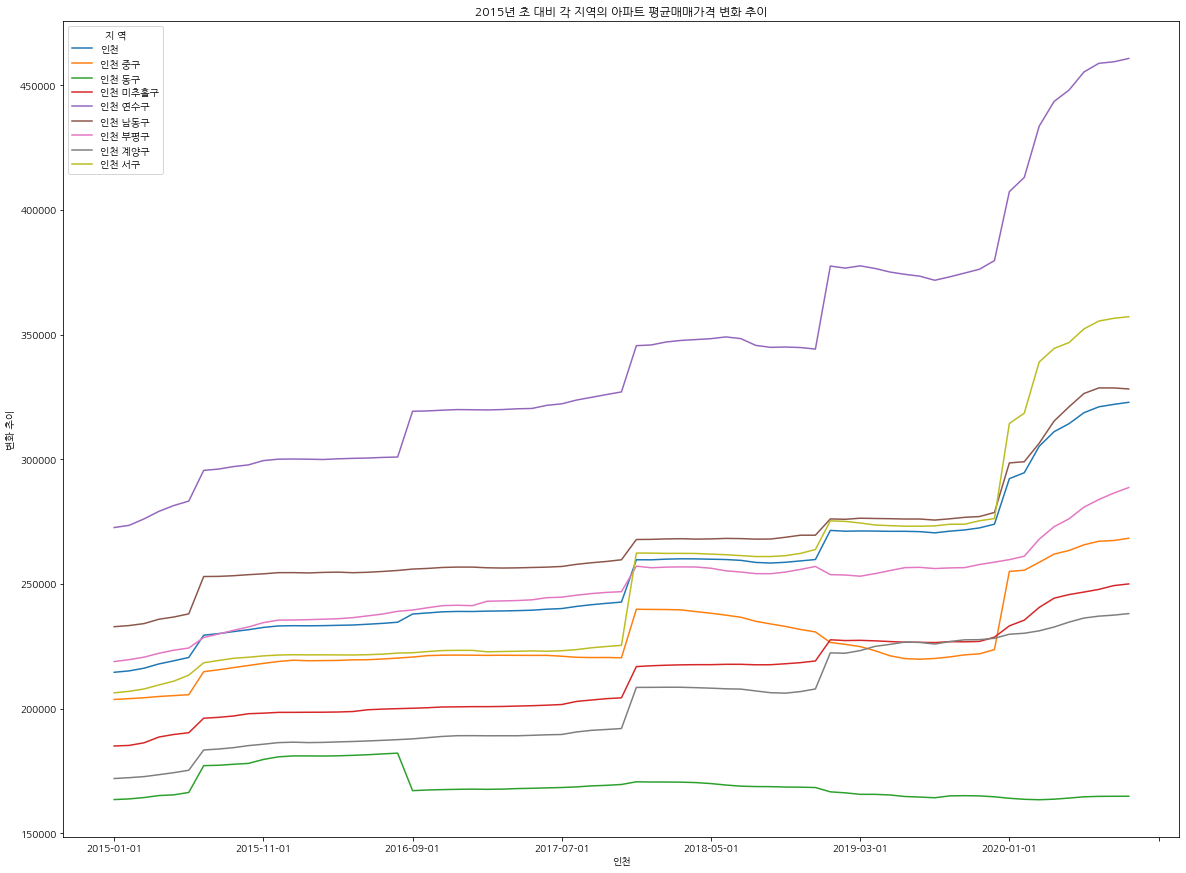

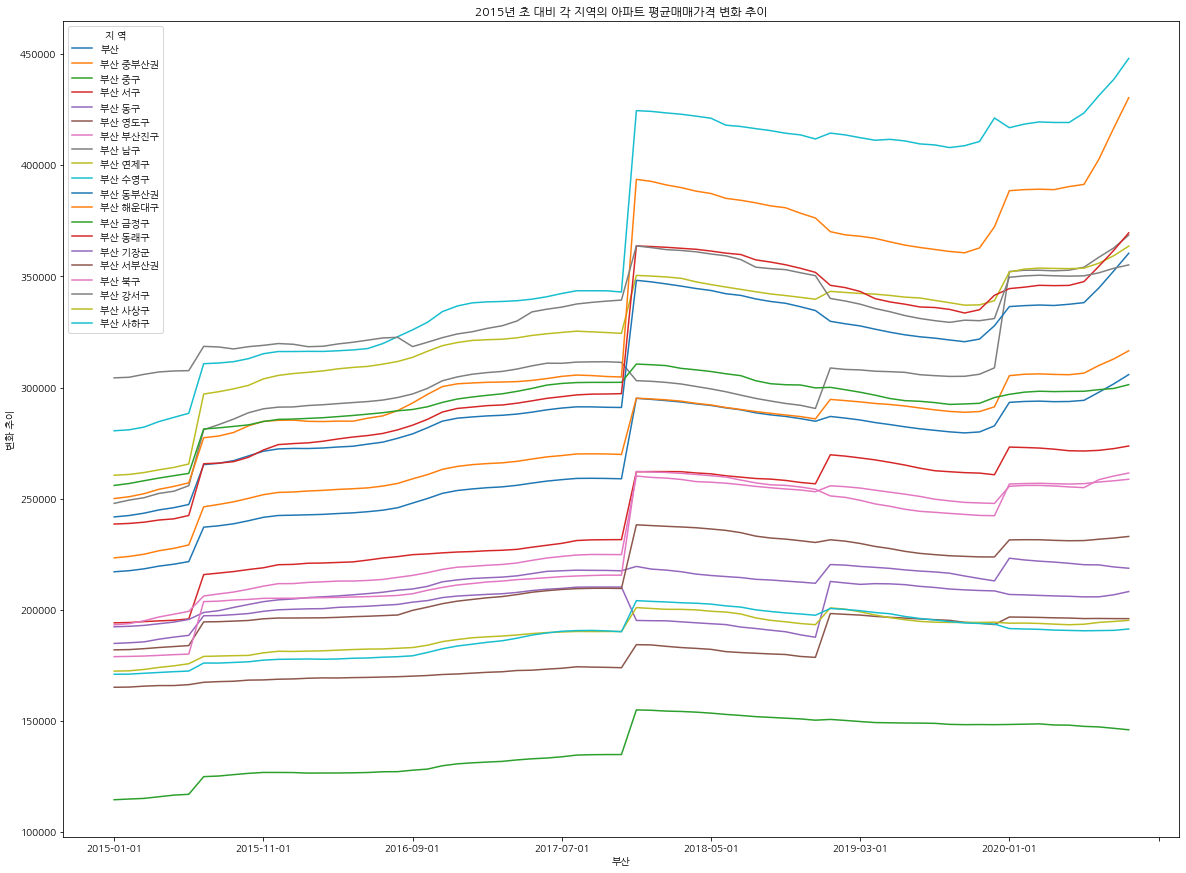

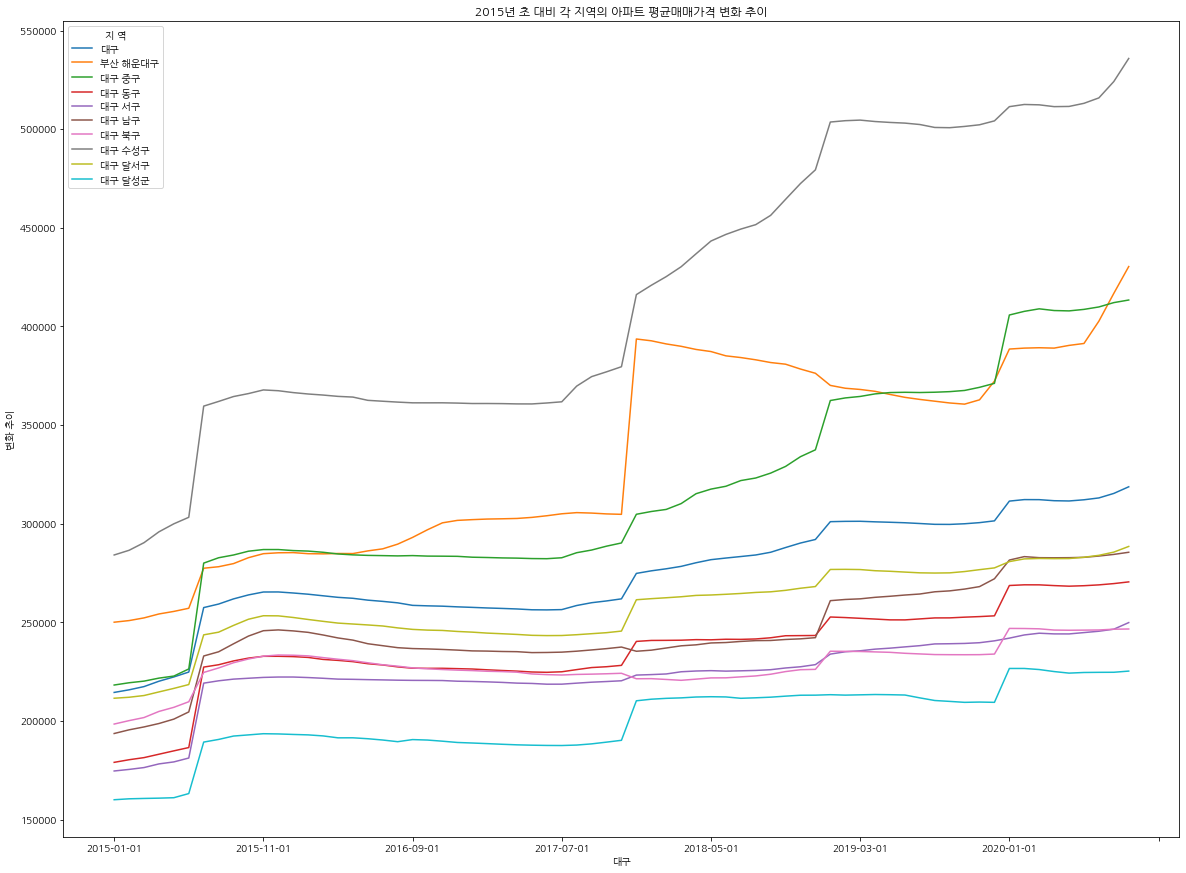

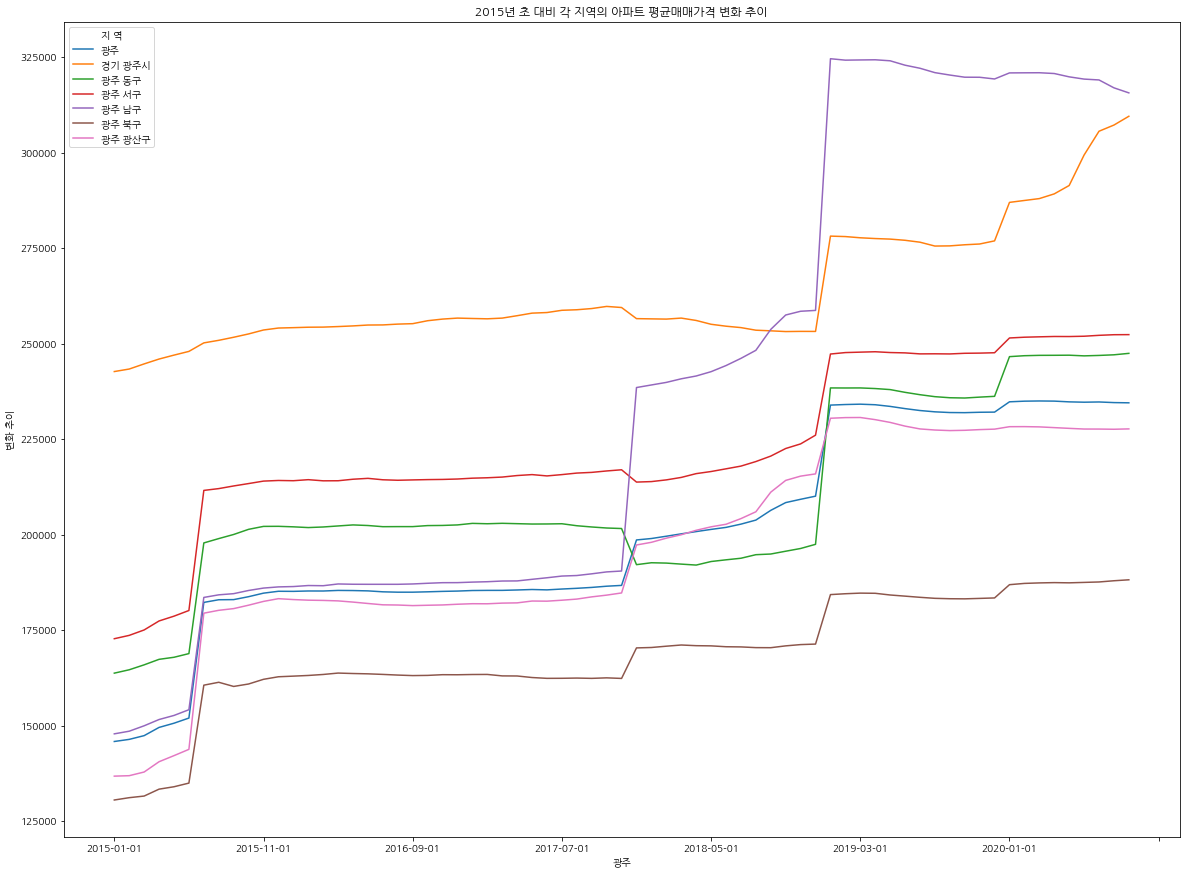

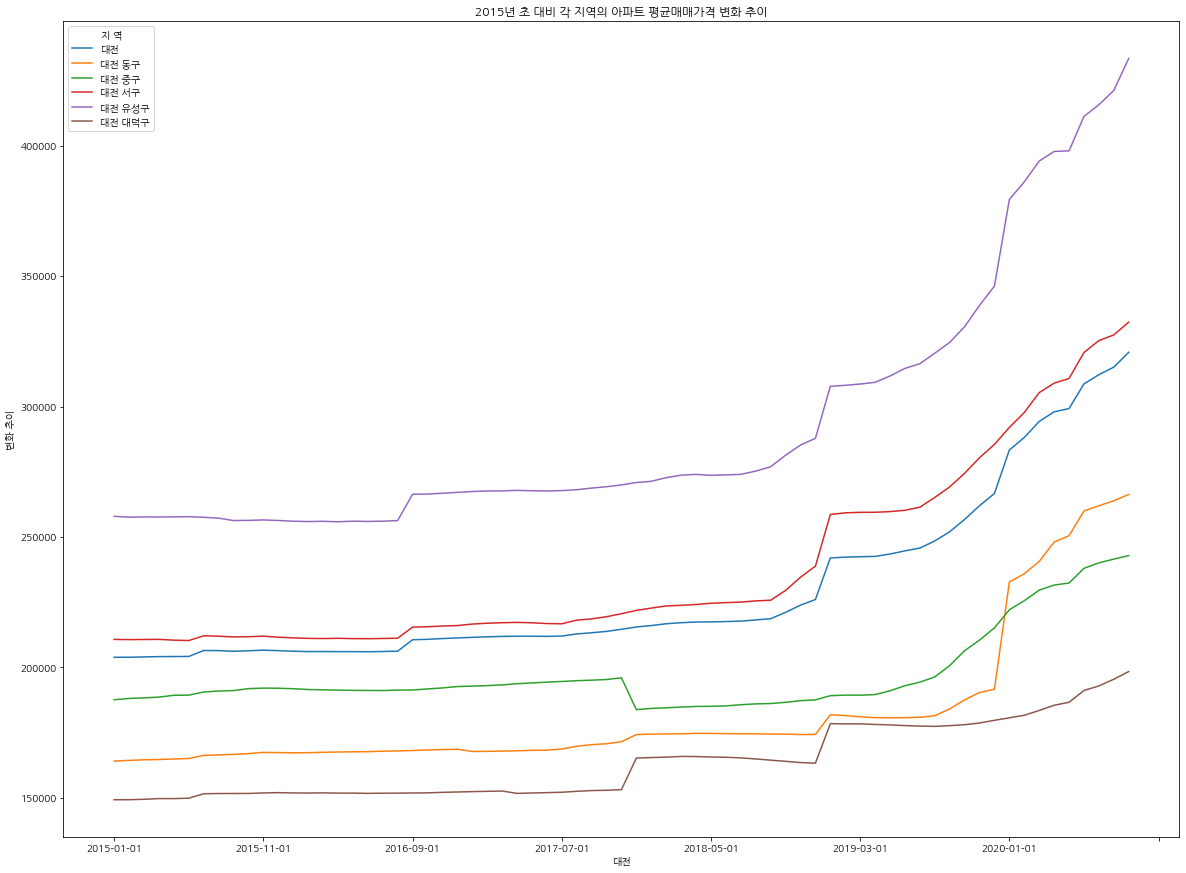

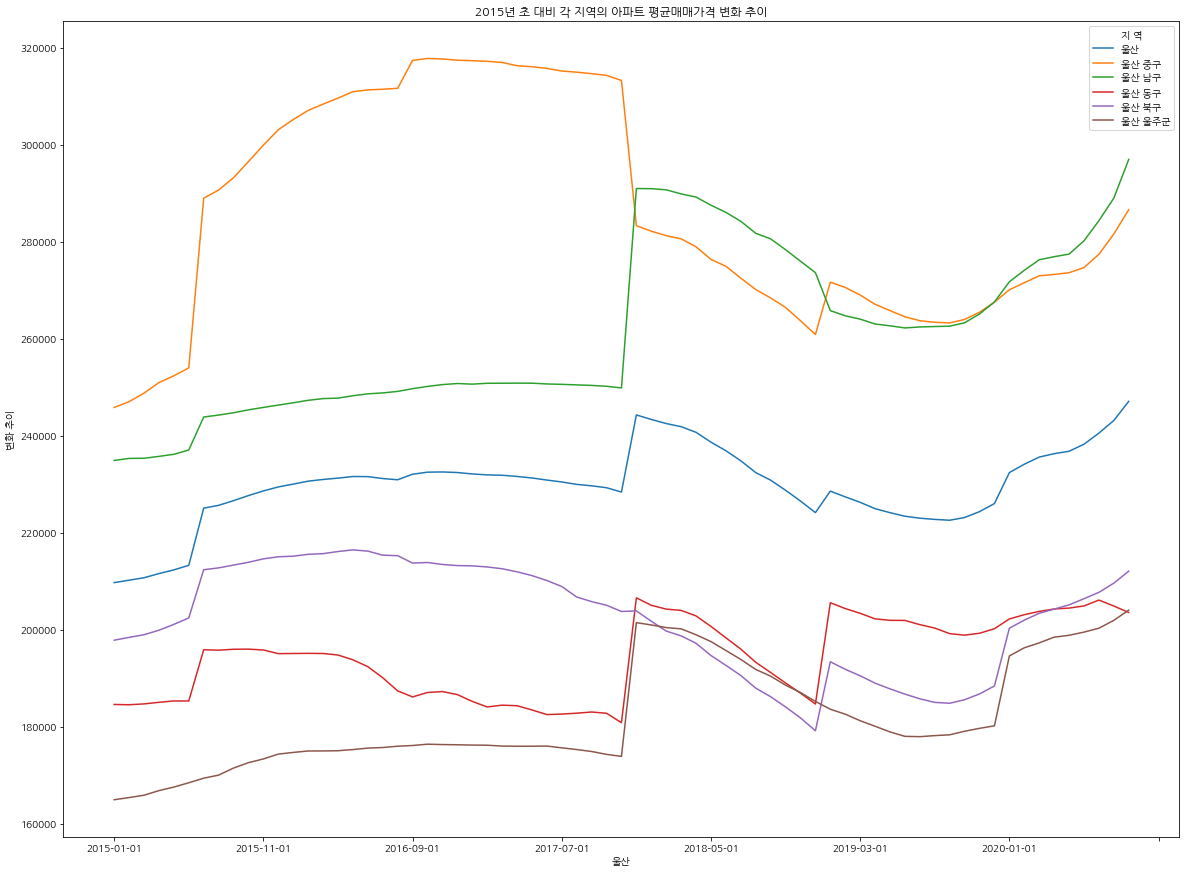

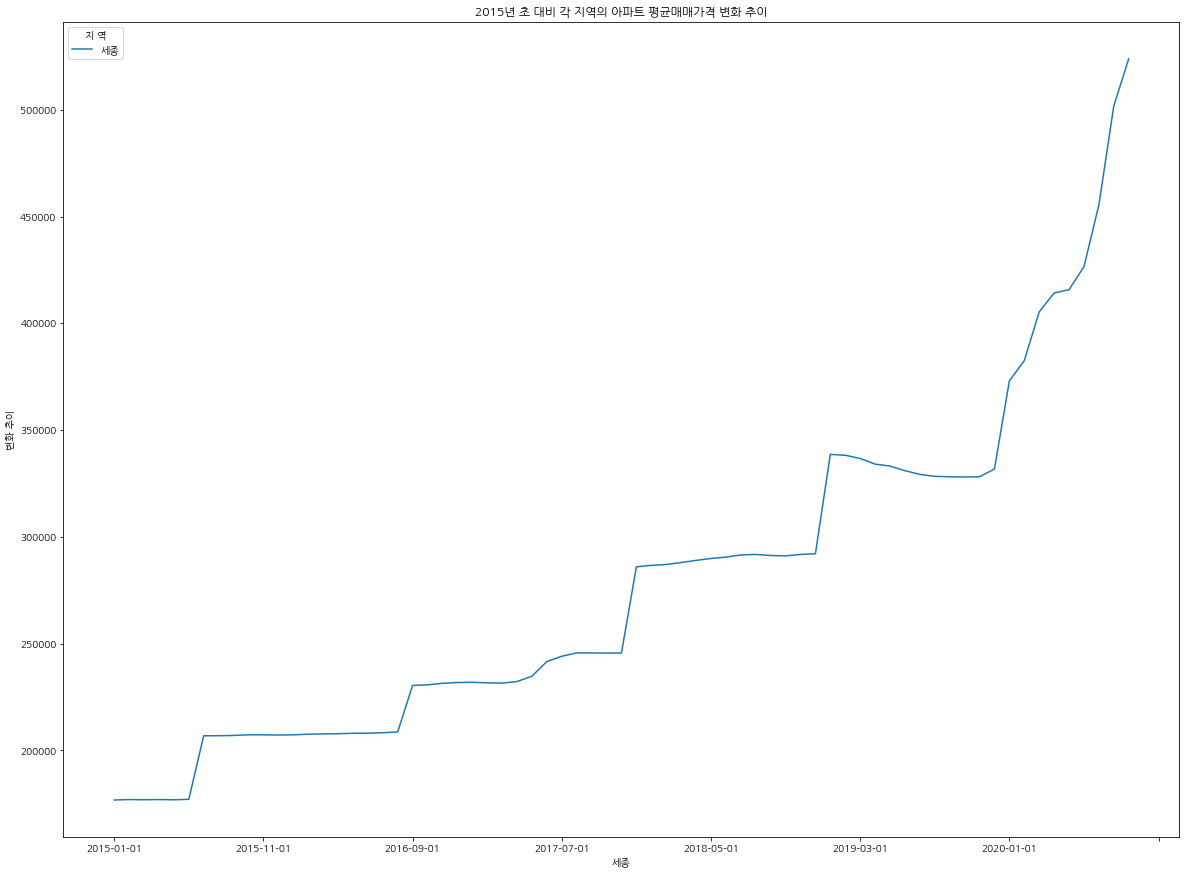

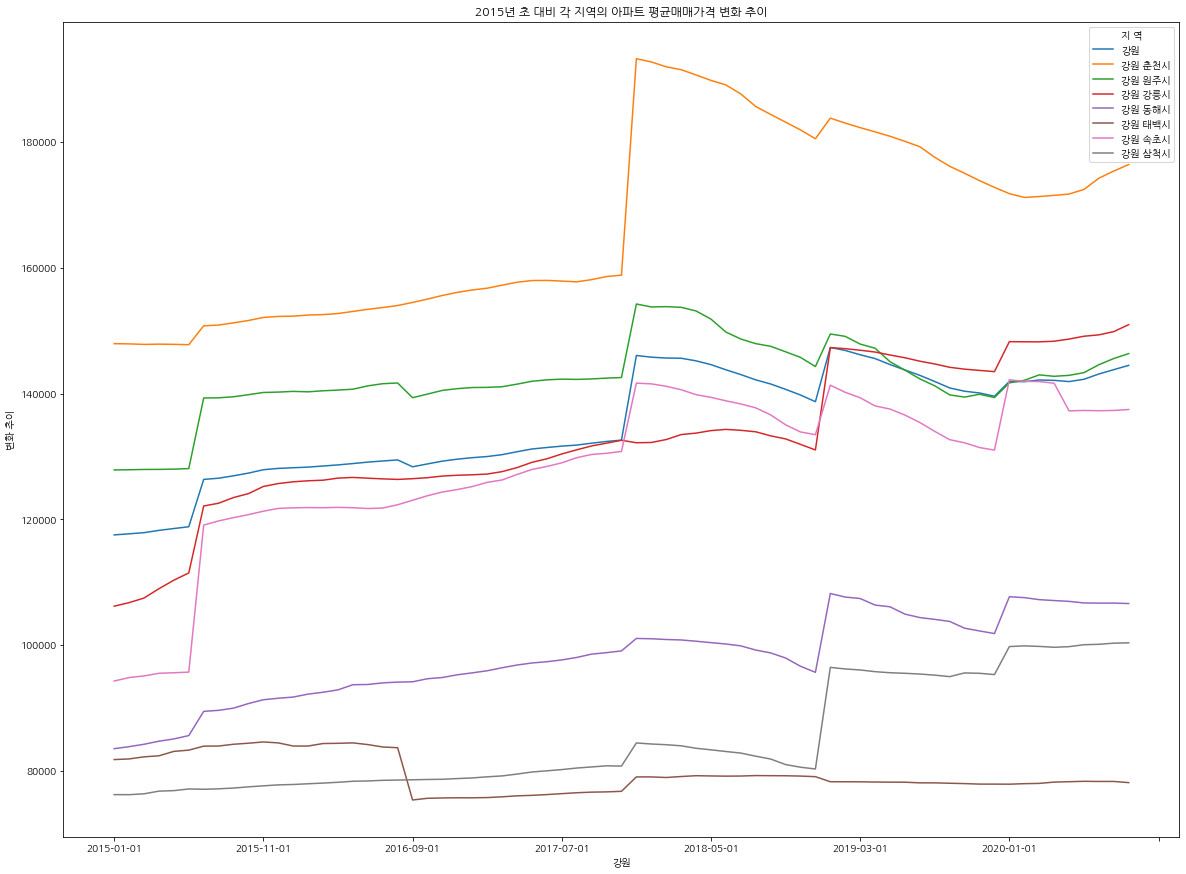

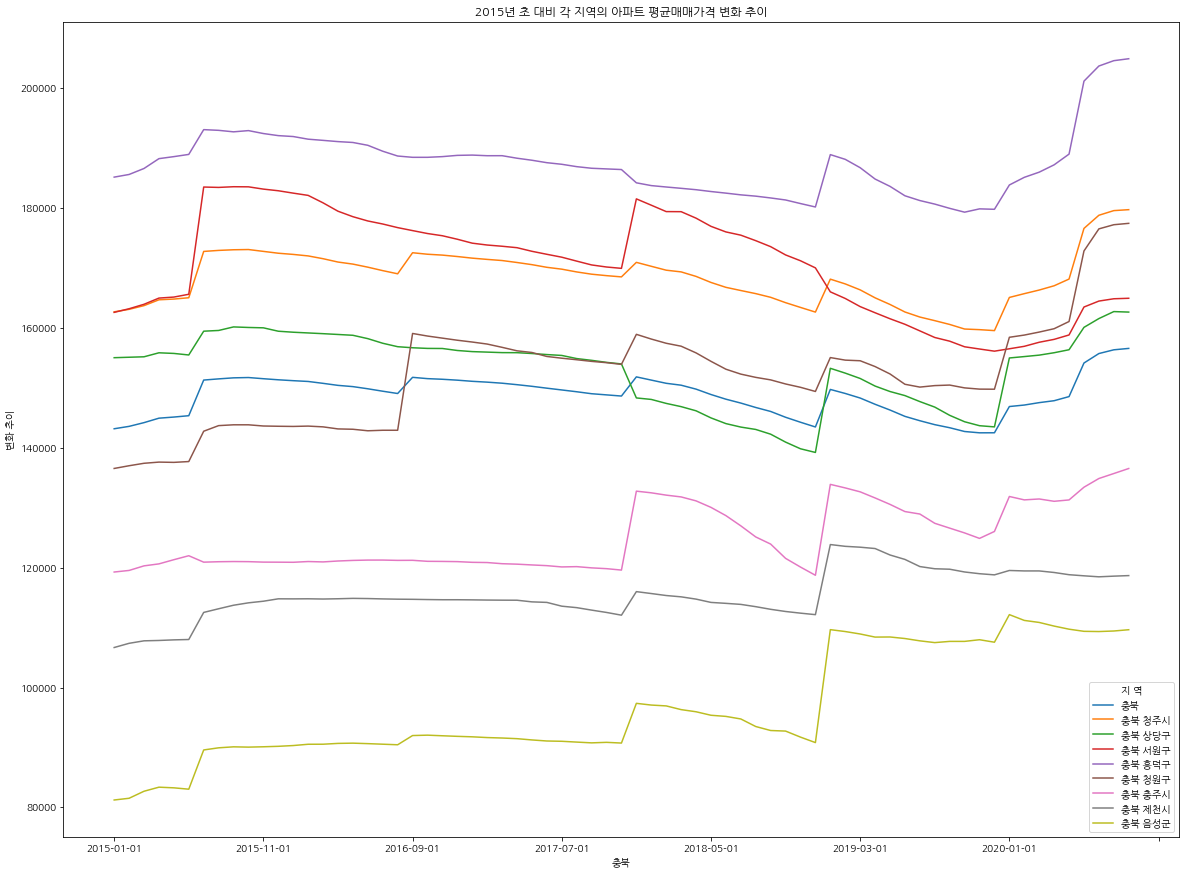

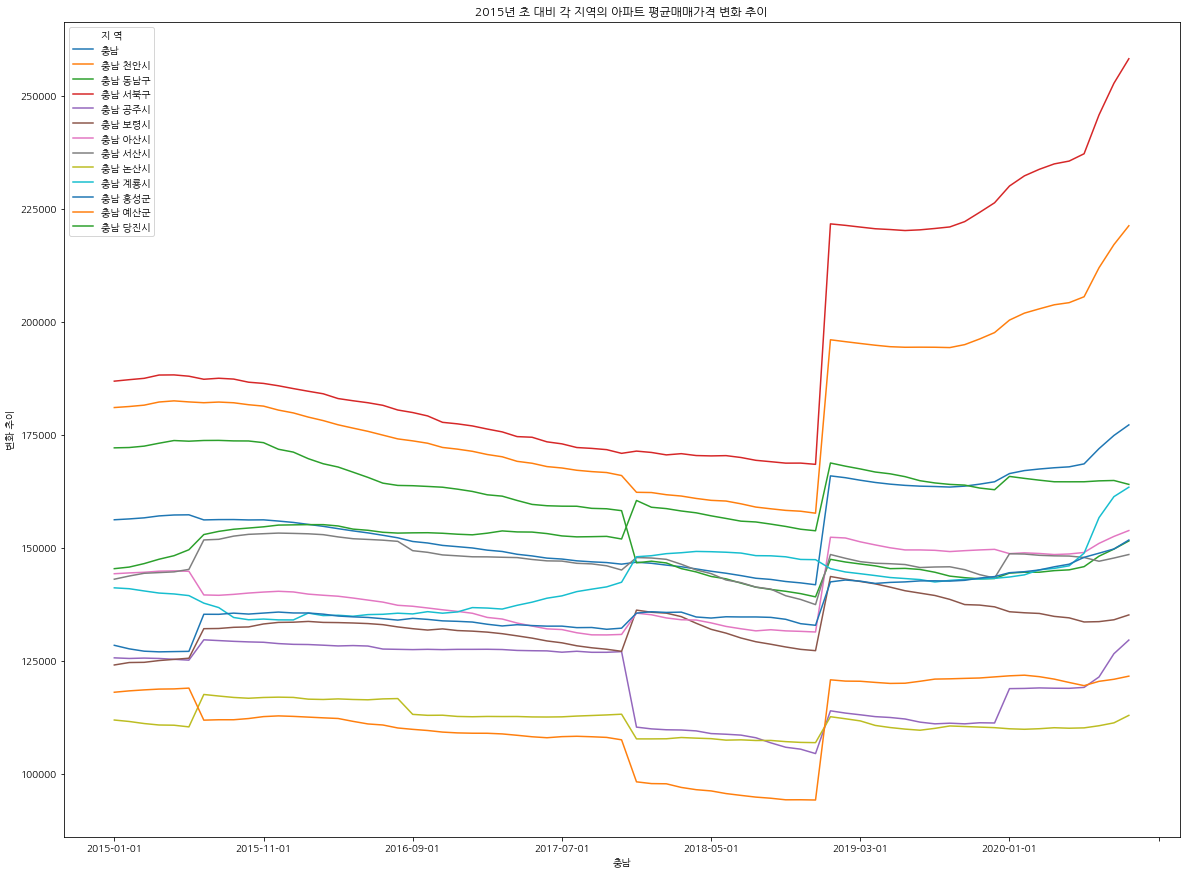

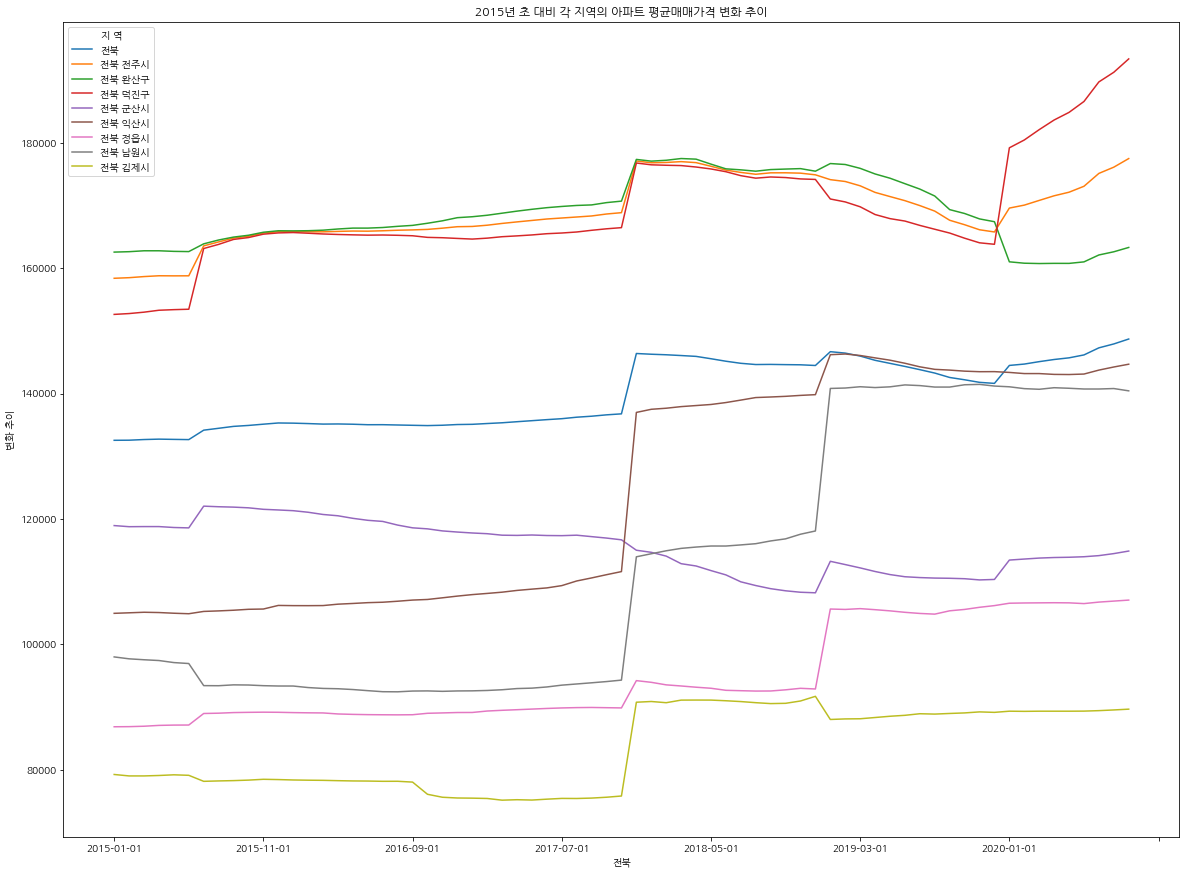

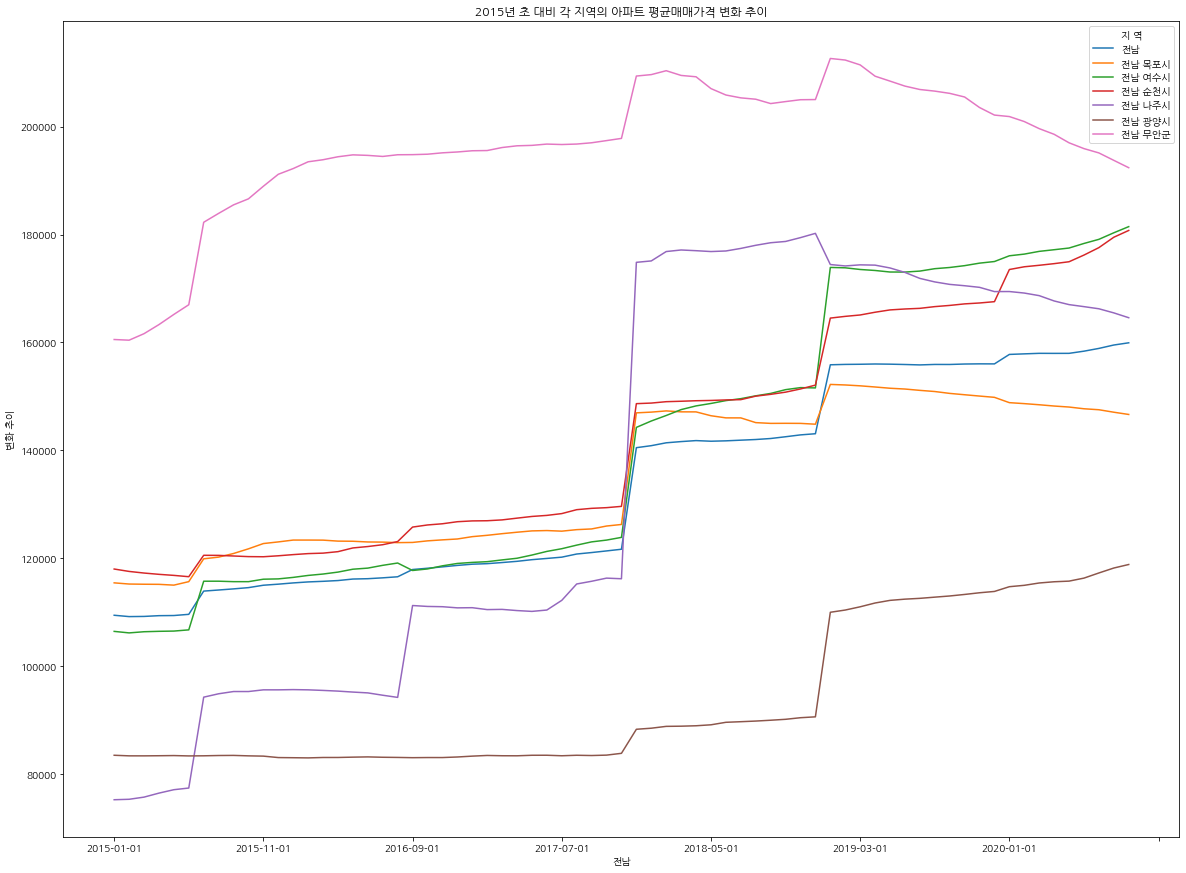

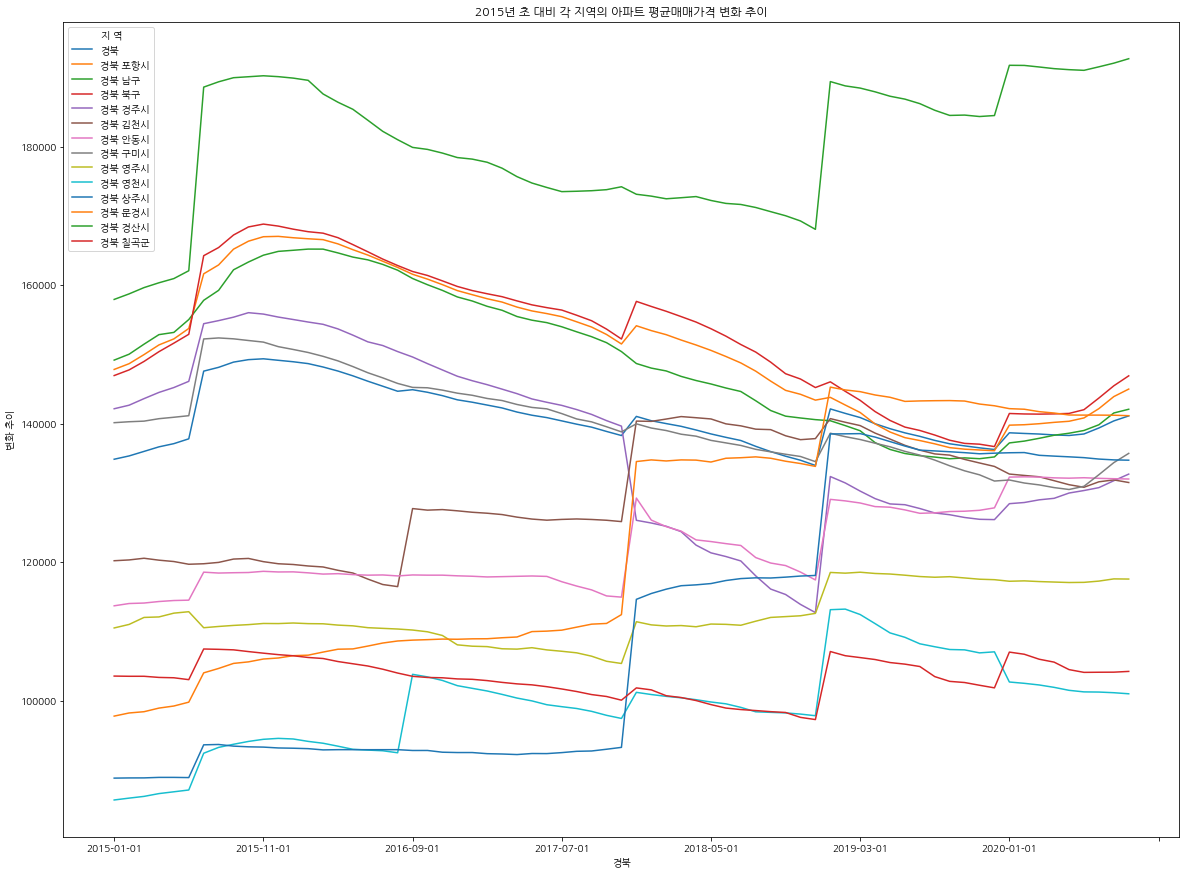

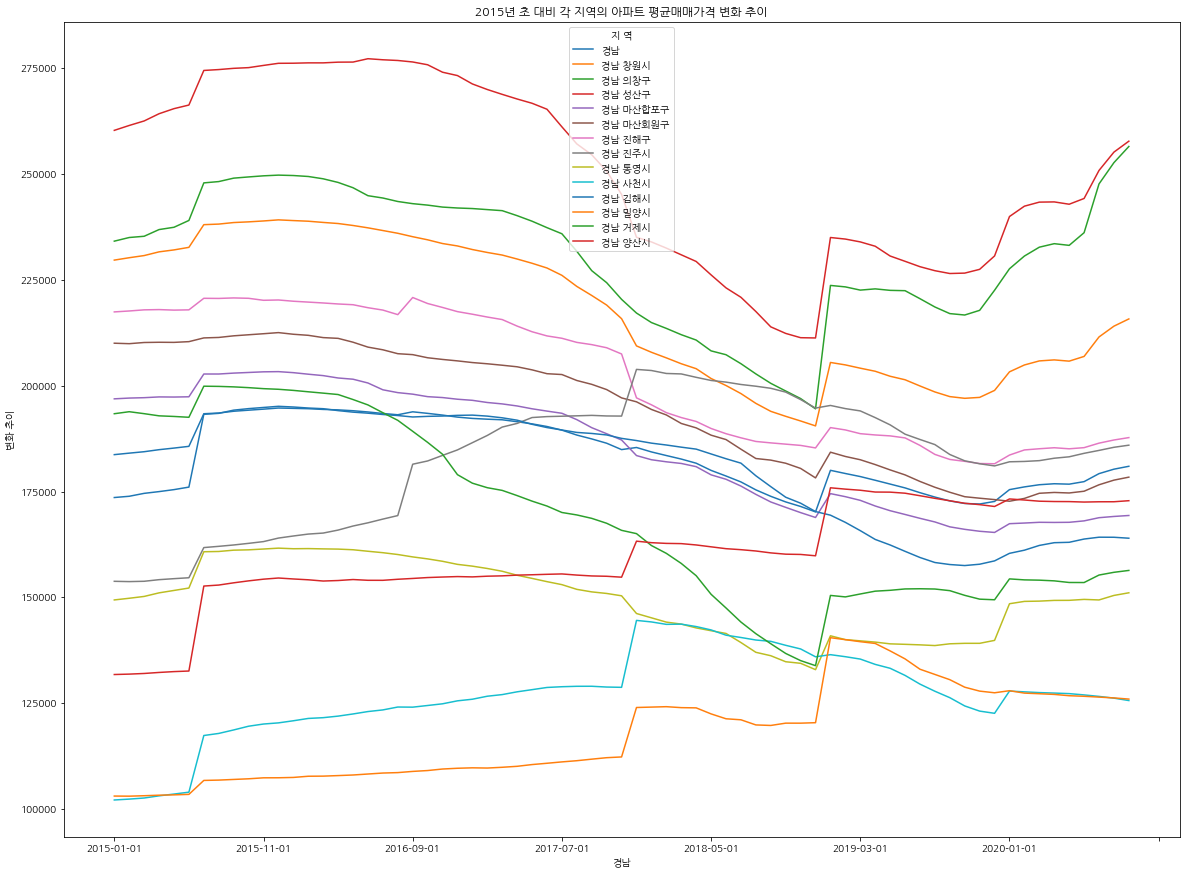

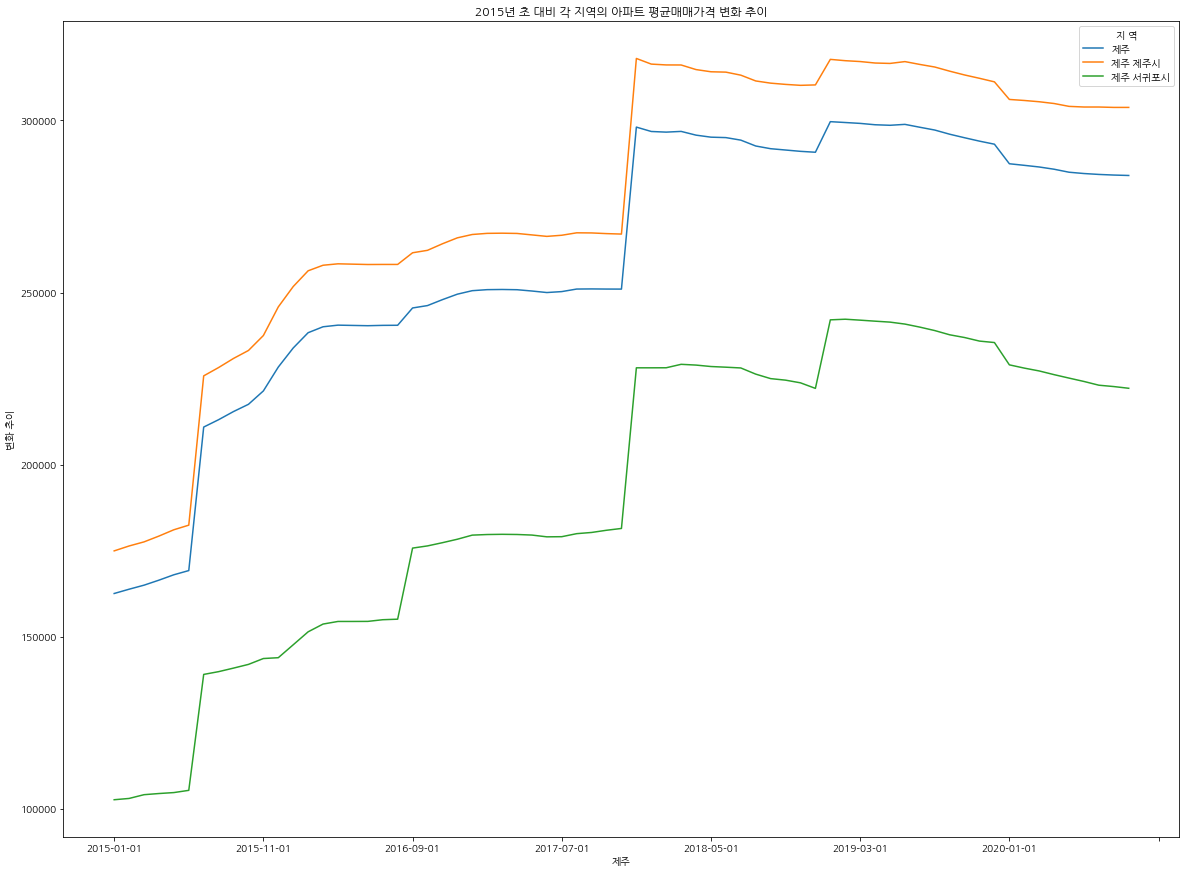

In [59]:
locations = ['서울', '경기', '인천', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

for location in locations:
    loc = df.index.str.contains(location)
    df_loc = df[loc]
    df_loc = df_loc.loc[:, '2015-01-01':]
    df_loc.T.plot(figsize = (20, 15))
    plt.title("2015년 초 대비 각 지역의 아파트 평균매매가격 변화 추이")
    plt.xlabel(location)
    plt.ylabel("변화 추이")
    plt.show()

In [13]:
df2 = df[['2015-01-01', '2019-09-01']]
df2

,2015-01-01,2019-09-01
지 역,,
전국,256960,344798
서울,500454,801480
경기,271274,352063
인천,214626,271206
부산,217114,280051
...,...,...
경남 밀양시,103090,130569
경남 거제시,193366,151589
경남 양산시,131788,172817


In [14]:
# 증가율(상승률) 계산
df2['increase_rate'] = (df2['2019-09-01'] - df2['2015-01-01'])/df2['2015-01-01'] * 100
df2 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2015-01-01,2019-09-01,increase_rate
지 역,,,
전국,256960,344798,34.183531
서울,500454,801480,60.150583
경기,271274,352063,29.781328
인천,214626,271206,26.362137
부산,217114,280051,28.987997
...,...,...,...
경남 밀양시,103090,130569,26.655350
경남 거제시,193366,151589,-21.605143
경남 양산시,131788,172817,31.132577


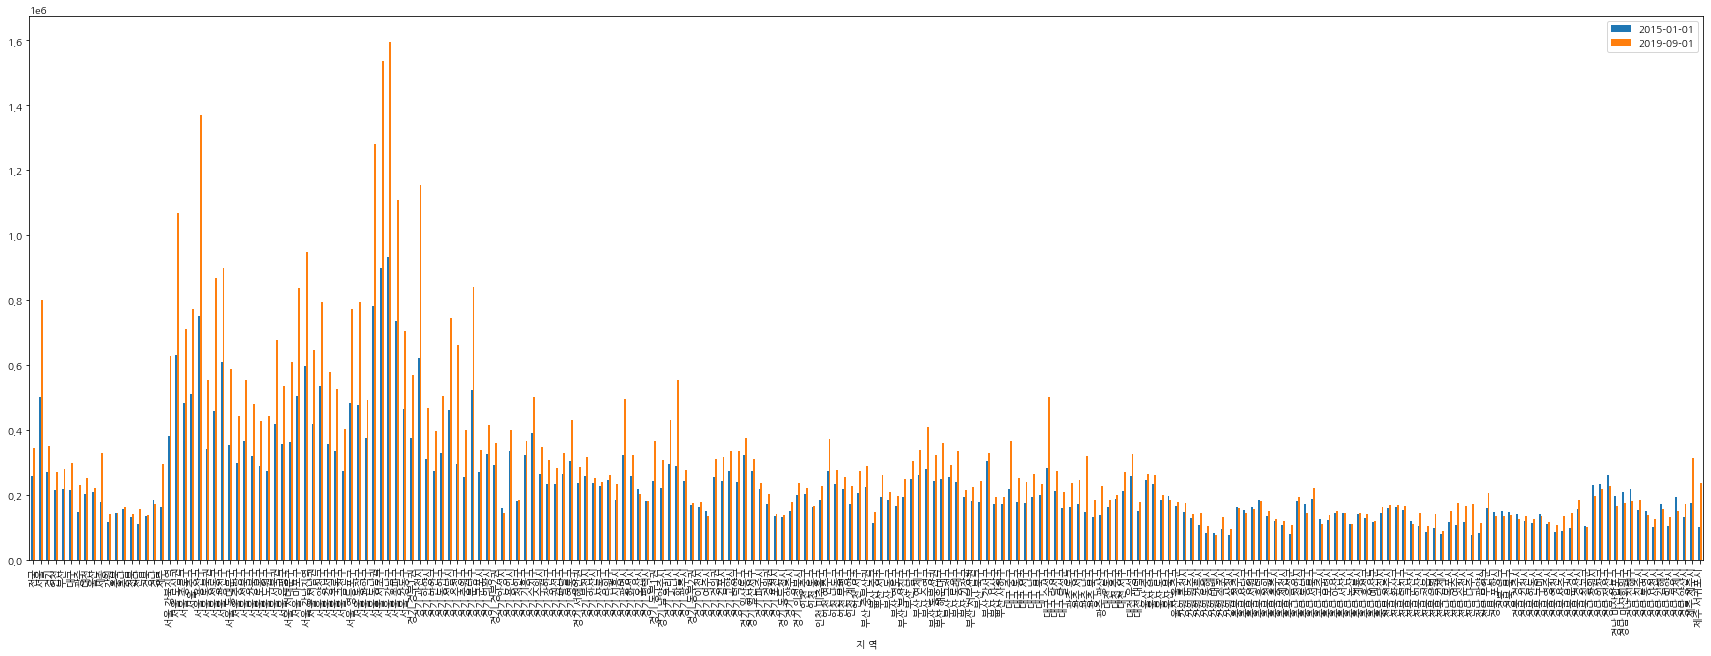

In [15]:
df2[['2015-01-01', '2019-09-01']].plot.bar(figsize = (30, 10))
plt.show()

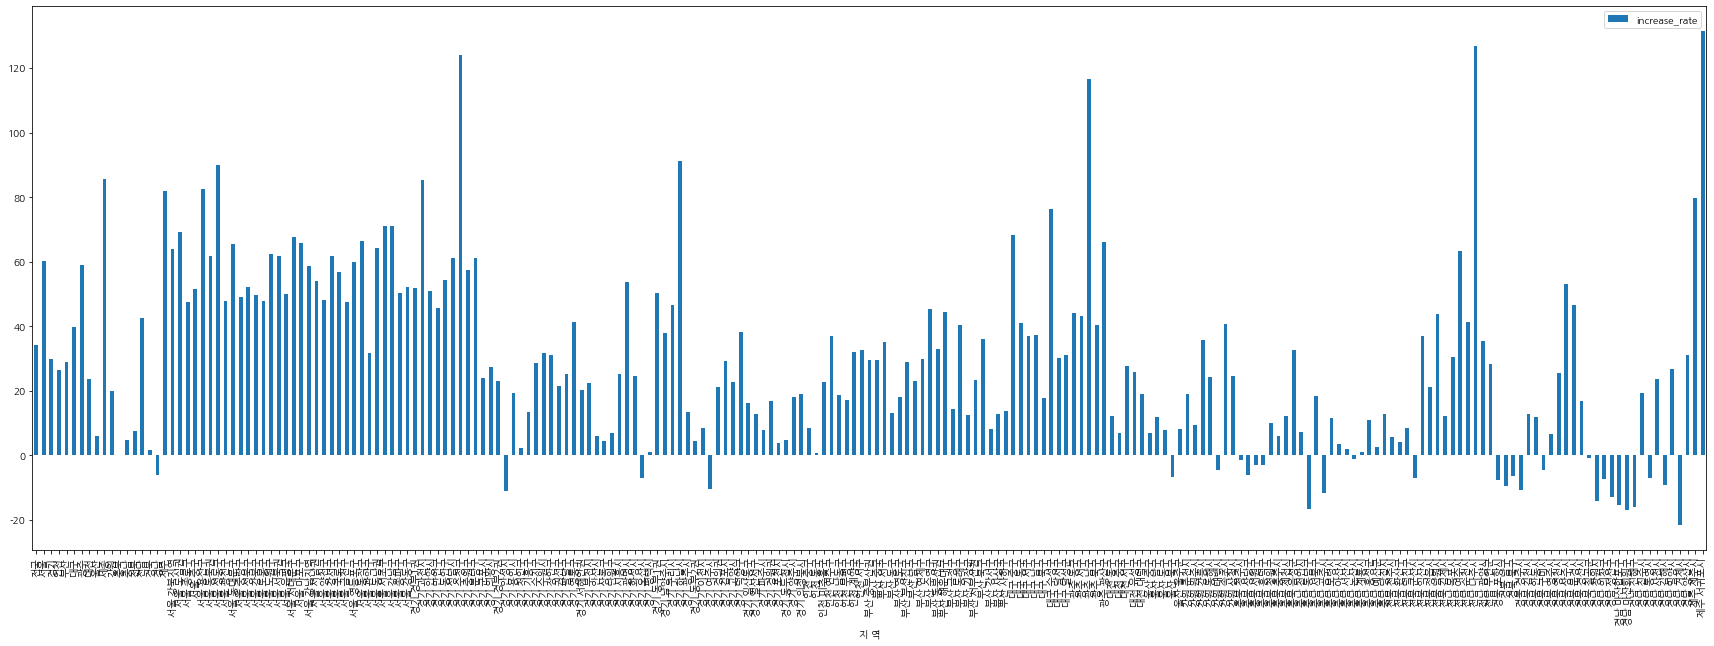

In [16]:
df2[['increase_rate']].plot.bar(figsize = (30, 10))
plt.show()

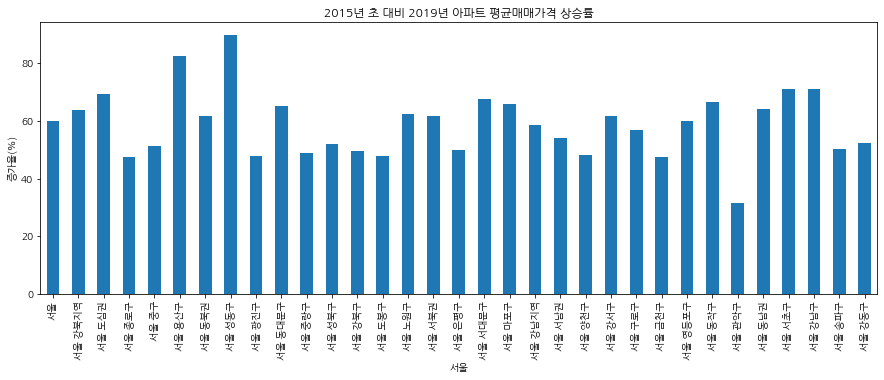

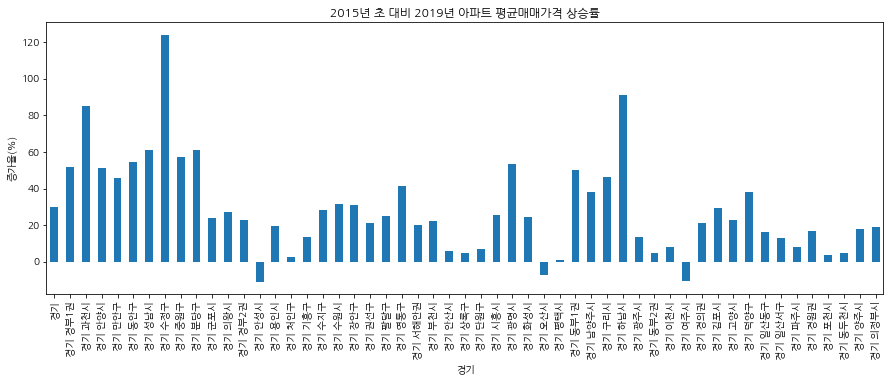

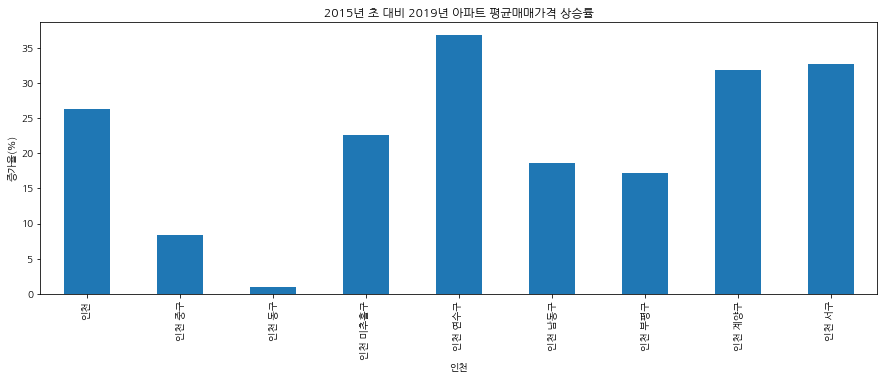

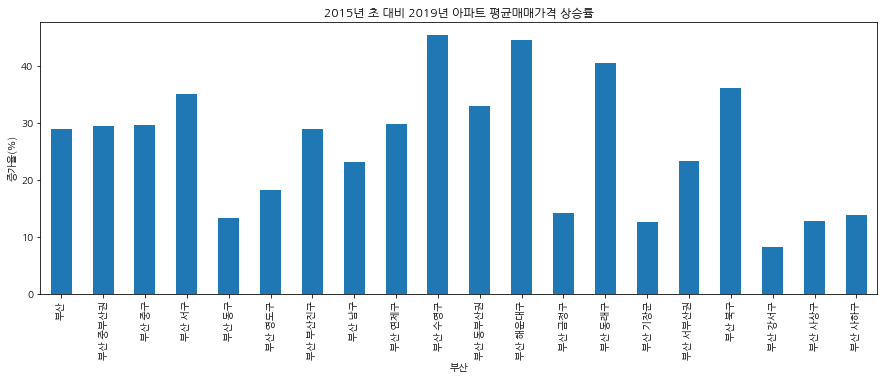

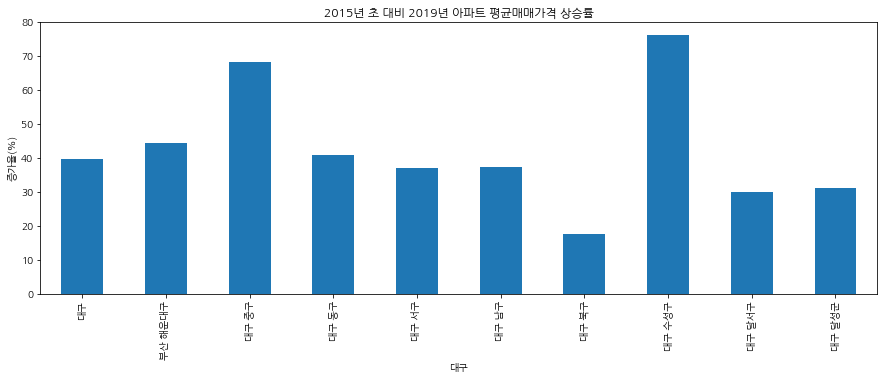

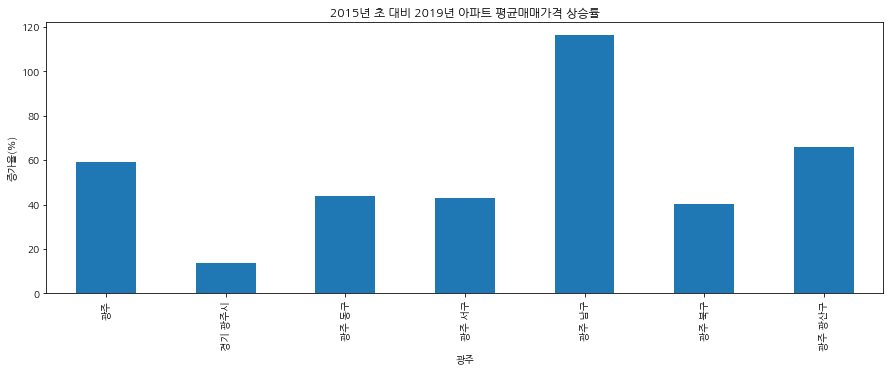

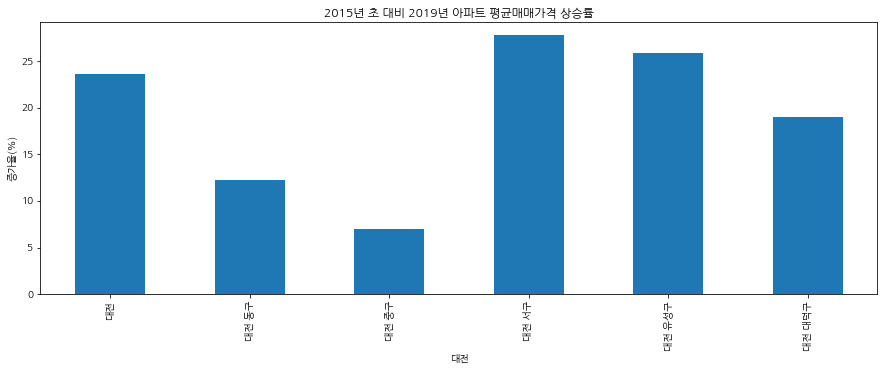

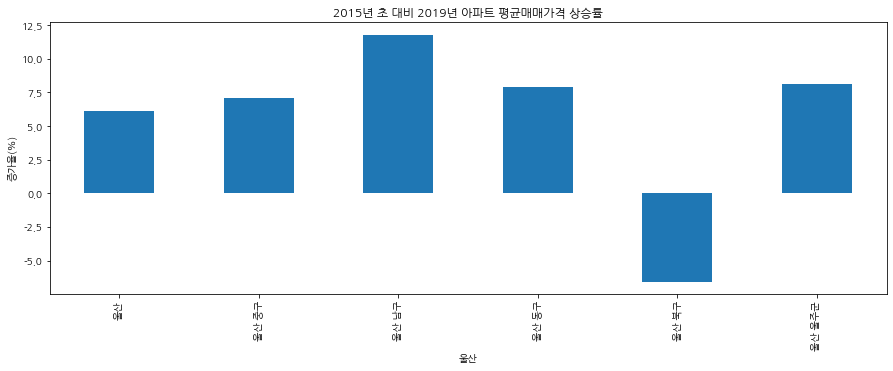

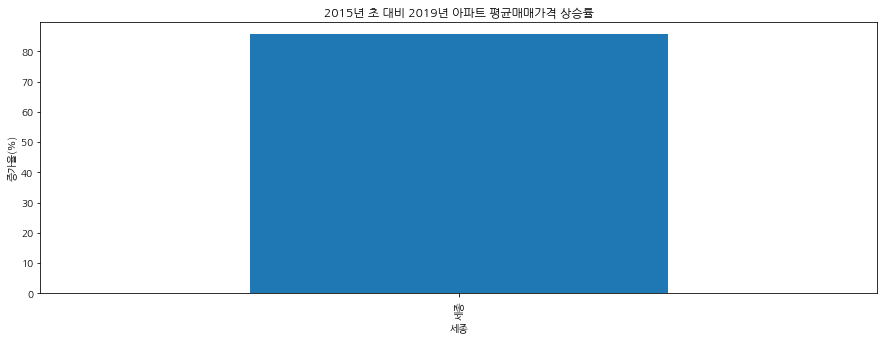

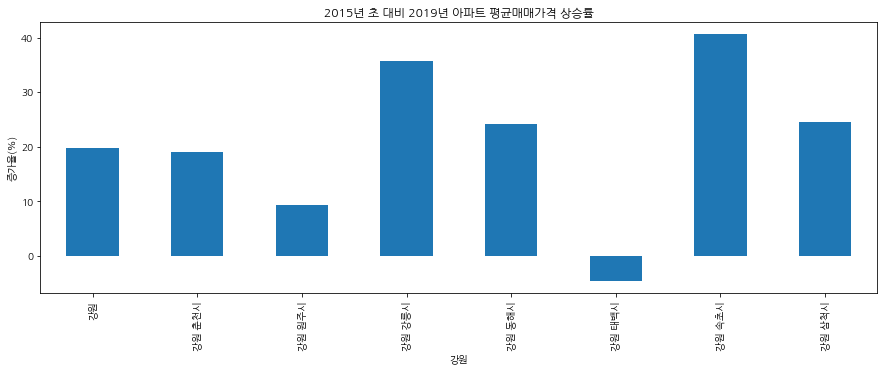

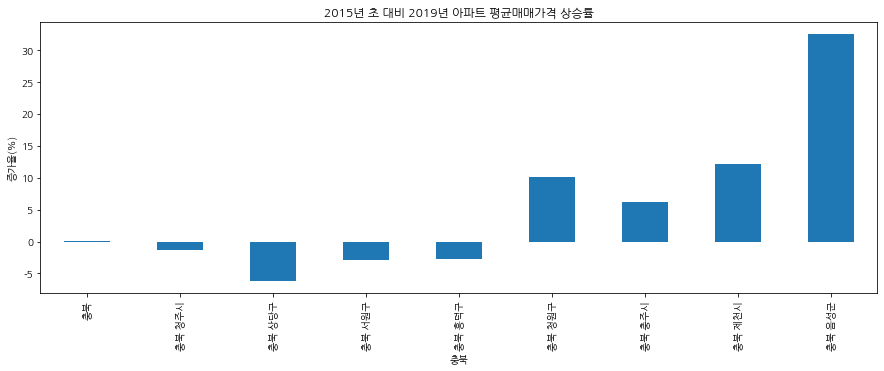

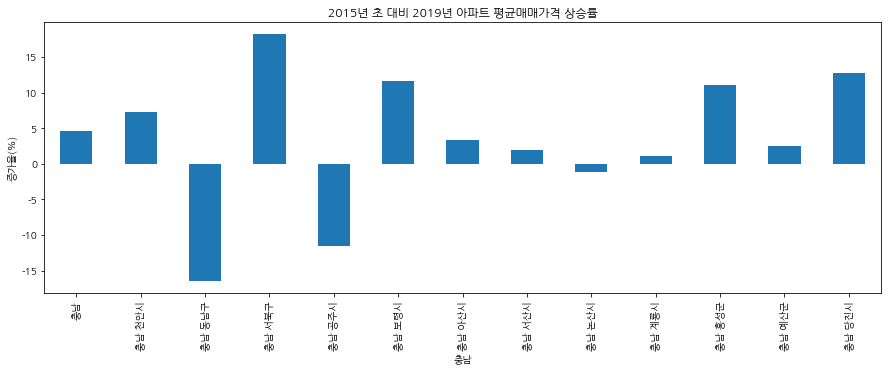

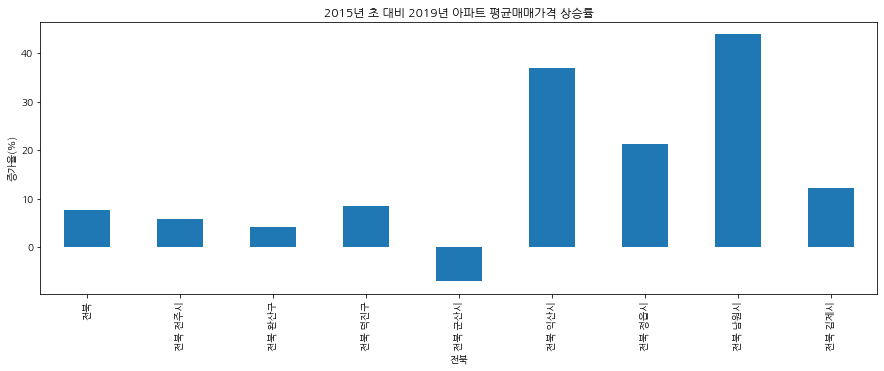

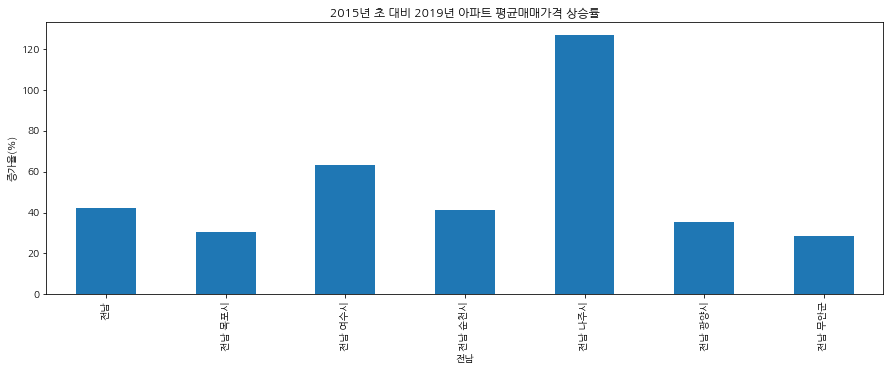

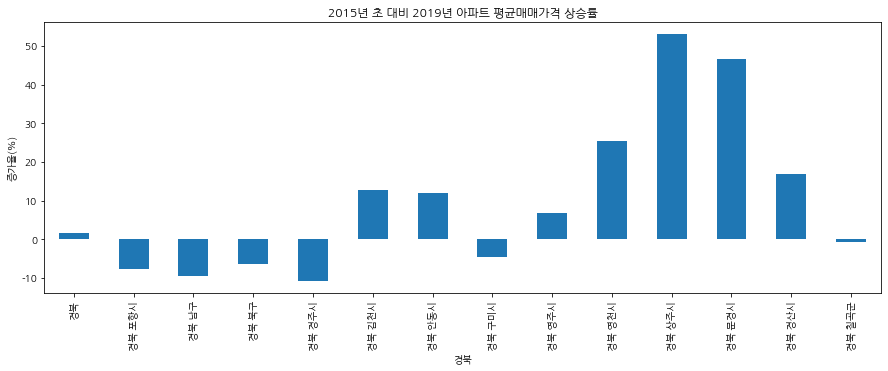

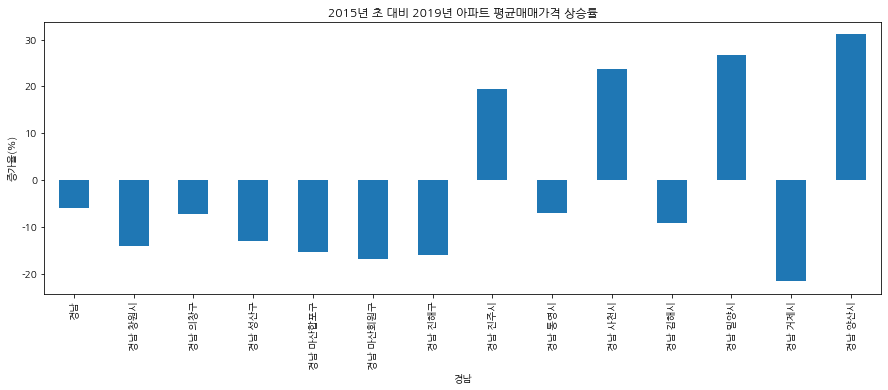

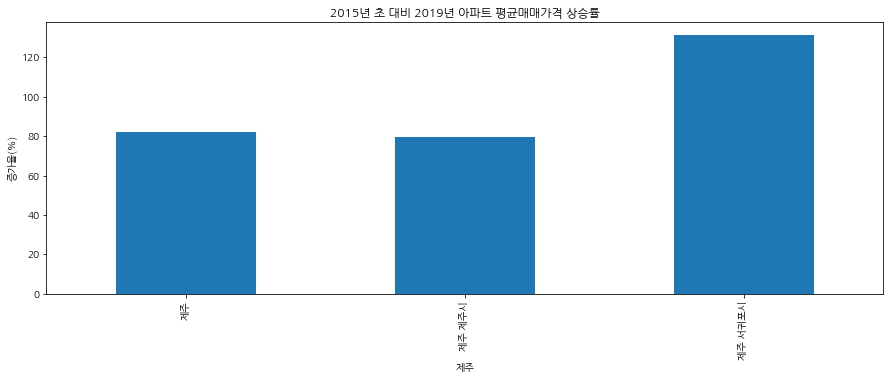

In [60]:
locations = ['서울', '경기', '인천', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

for location in locations:
    loc = df.index.str.contains(location)
    df_loc = df[loc]
    df_loc = df_loc[['2019-09-01', '2015-01-01']]
    df_loc = (df_loc['2019-09-01'] - df_loc['2015-01-01'])/df_loc['2015-01-01'] * 100
    df_loc.plot.bar(figsize = (15, 5))
    plt.title("2015년 초 대비 2019년 아파트 평균매매가격 상승률")
    plt.xlabel(location)
    plt.ylabel("증가율(%)")
    plt.show()

# 2012년 12월 대비 2020년 9월을 기준으로 ‘서울, 경기, 인천, 부산, 대구, 광주, 대전, 울산, 세종, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주’ 지역들의 아파트 평균매매가격의 상승률과 ‘전국’ 아파트 평균매매가격의 상승률간의 관계 분석

In [18]:
df_change_trend = df.loc[:'제주', :]
df_change_trend

,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,2013-11-01,2013-12-01,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,...,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01
지 역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
전국,251459,250134,249292,248895,248952,249460,249330,248705,248058,248189,249144,249657,250066,252332,253063,253977,254180,254179,254207,254273,254646,255658,256639,257252,257685,256960,257770,258966,260724,262134,263642,274990,276080,277359,278709,279746,280443,280494,280335,280234,...,286026,286673,287768,287993,288461,289072,313552,315961,318503,319757,320248,320271,320157,320135,320944,323915,325205,325441,325014,349426,348312,347165,345809,344891,344322,344195,344332,344798,346156,348031,351787,366793,368783,372016,373252,373608,375821,380260,383529,386235
서울,499900,496180,494168,493675,494492,495511,493908,490682,488116,488428,490519,490840,490524,490995,492451,494338,494478,494042,493673,493652,494256,496425,498452,499009,498927,500454,502150,504979,508683,512004,515481,537536,540479,543833,547153,549204,551299,551346,550462,550313,...,576774,579325,582818,582609,584459,587516,659905,673522,686220,691838,693673,694435,694739,695931,702383,716453,720347,719724,717749,810129,806027,802157,799211,797617,797214,798302,799721,801480,807121,813573,827228,877128,877185,876857,873791,870742,871897,881834,886216,888511
경기,263679,262280,261285,261065,261526,261571,260887,260116,260103,261088,261539,262059,264497,265342,266580,266507,266261,266134,266125,266520,267930,269061,269815,270360,270250,271274,272571,274623,276293,277964,287534,288662,289937,291476,292610,293223,293358,293362,293291,293230,...,299812,301247,302000,302598,303176,320920,321896,323802,325231,326362,326840,327185,327297,327732,330735,333158,334458,334469,355541,354658,353599,351599,350168,349317,349249,349695,350665,352063,354143,357767,378093,383242,391027,395275,397329,400898,406661,411193,415139,418927
인천,202523,200792,199521,198613,198803,198975,198906,198652,198262,198428,199825,200720,201236,208264,208972,210232,210733,211004,211121,211299,211647,212331,213001,213614,213870,214626,215182,216256,217981,219230,220569,229480,230134,230948,231698,232615,233204,233304,233258,233324,...,239925,240175,241043,241722,242268,242772,259746,259720,259991,260130,260092,259964,259834,259501,258676,258424,258735,259280,259838,271507,271187,271290,271245,271141,271150,271014,270529,271206,271693,272516,274008,292262,294635,305255,311097,314314,318708,321070,322046,322873
부산,212792,212029,211543,211226,211163,211226,211071,210624,210403,210323,210578,210837,211065,212841,213118,213302,213504,213682,213954,214303,214584,215037,215522,216050,216612,217114,217596,218433,219658,220524,221693,237179,237797,238702,240069,241606,242432,242576,242746,242939,...,257901,258554,259110,259166,259093,258951,295127,294662,294103,293482,292654,291929,290841,289957,288613,287686,286998,286000,284824,286979,286234,285387,284237,283320,282316,281421,280739,280051,279576,280010,282744,293320,293719,293869,293628,293705,294232,297860,301641,305813
대구,178616,179567,179950,180251,181879,183502,185337,187904,189282,190285,191806,193837,196511,200266,201950,203194,204525,205357,205856,206427,207244,208527,209836,211531,213401,214446,215765,217

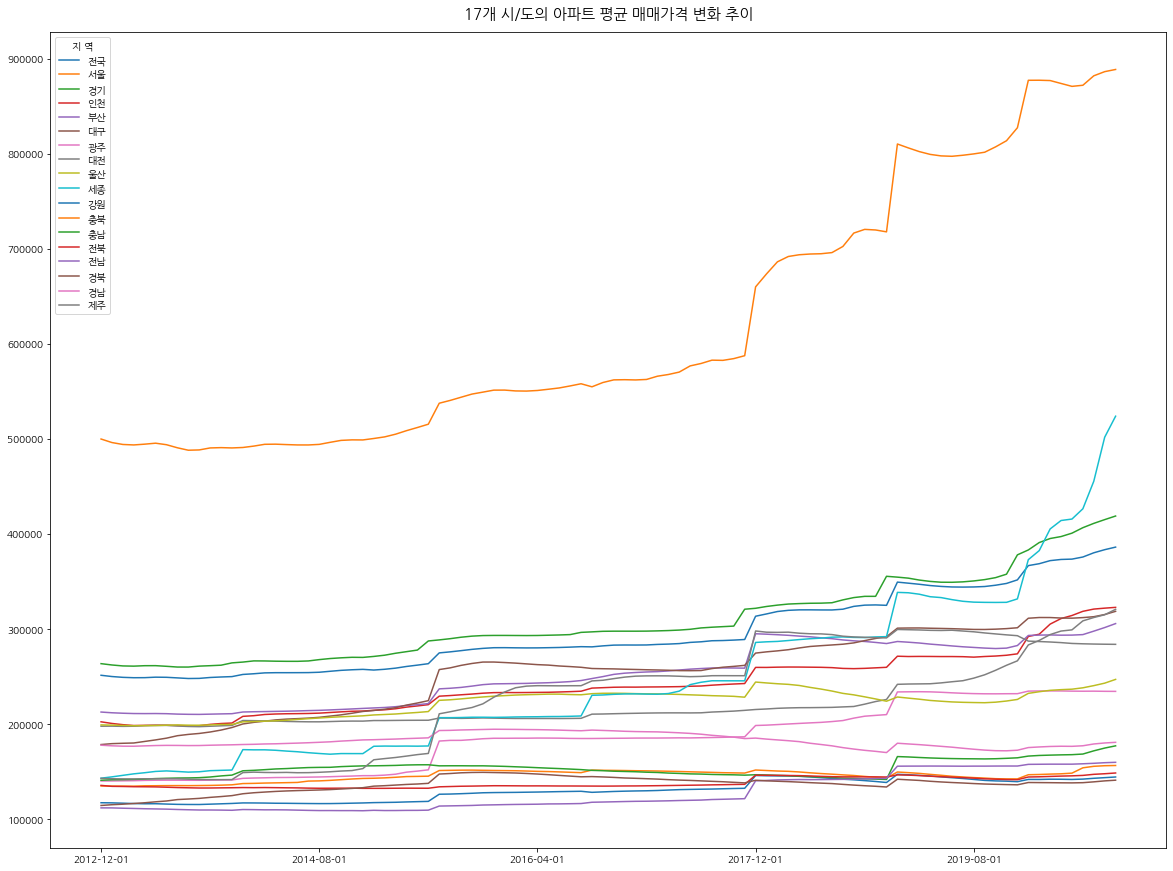

In [66]:
df_change_trend.T.plot(figsize = (20, 15))
plt.title("17개 시/도의 아파트 평균 매매가격 변화 추이", size = 15, y = 1.01)
plt.show()

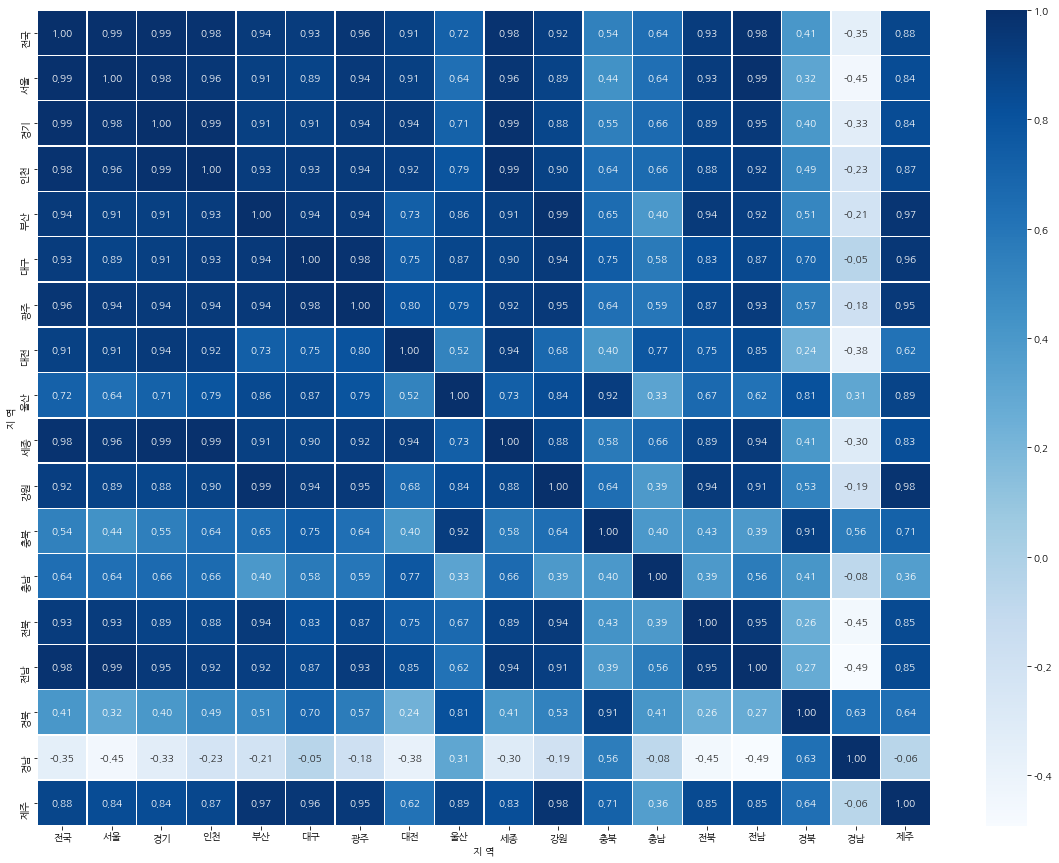

In [21]:
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(data = df_change_trend.T.corr(), annot = True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

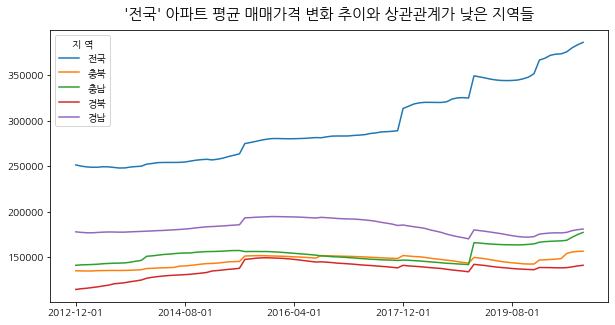

In [73]:
# '전국' 아파트 평균 매매율과 상관관계가 낮은 지역들 
df_change_trend.T[['전국', '충북', '충남', '경북', '경남']].plot(figsize = (10, 5))
plt.title("'전국' 아파트 평균 매매가격 변화 추이와 상관관계가 낮은 지역들", size=15, y = 1.02)
plt.show()

# 17개의 시/도들의 매매가 양극화 현상에 대한 분석

In [38]:
df_increase_rate = df.loc[:'제주', :][['2012-12-01', '2019-09-01']]
df_increase_rate['increase_rate'] = (df_increase_rate['2019-09-01'] - df_increase_rate['2012-12-01'])/df_increase_rate['2012-12-01'] * 100
df_increase_rate

,2012-12-01,2019-09-01,increase_rate
지 역,,,
전국,251459,344798,37.118974
서울,499900,801480,60.328066
경기,263679,352063,33.519545
인천,202523,271206,33.913679
부산,212792,280051,31.607861
대구,178616,299625,67.748130
광주,140320,231987,65.327109
대전,197903,251975,27.322476
울산,199271,222605,11.709682


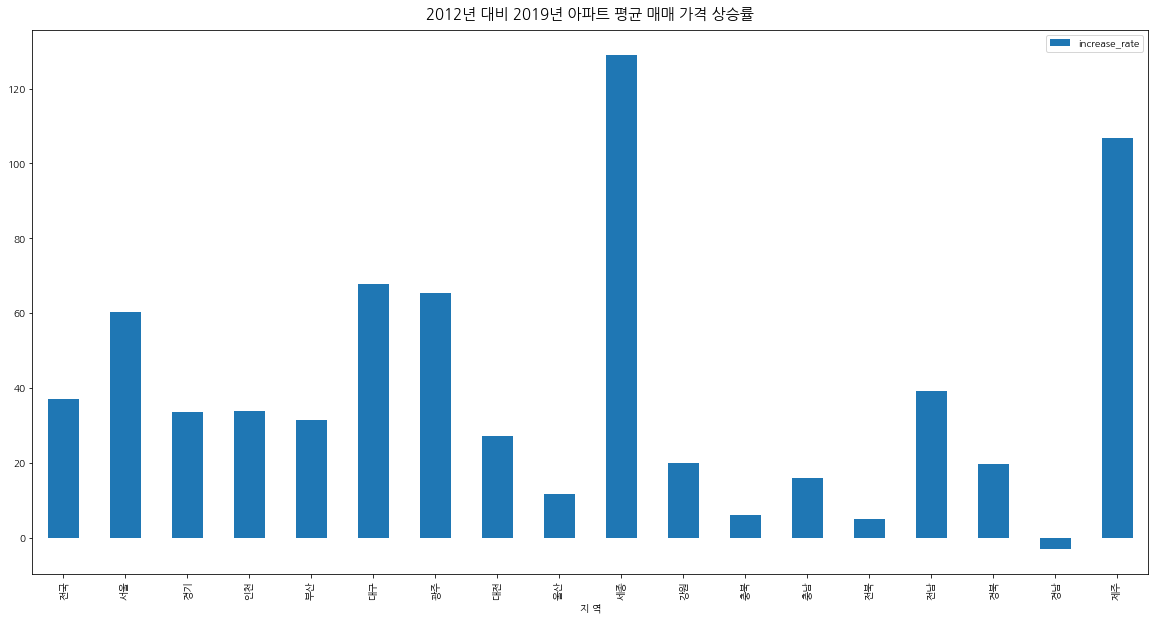

In [76]:
df_increase_rate[['increase_rate']].plot.bar(figsize = (20, 10))
plt.title("2012년 대비 2019년 아파트 평균 매매 가격 상승률", size=15, y=1.01)
plt.show()

- **매매가 상승폭이 가장 큰 5개 지역 : 세종, 제주, 서울, 대구, 광주**
- **매매가 상승폭이 가장 작은 5개 지역 : 울산, 충북, 충남, 전북, 경남**

In [40]:
df_change_trend.T

지 역,전국,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2012-12-01,251459,499900,263679,202523,212792,178616,140320,197903,199271,143257,117413,135084,141076,135665,112025,114554,177915,143091
2013-01-01,250134,496180,262280,200792,212029,179567,140341,197958,199022,144635,117293,134885,141586,134670,111989,115342,177287,142668
2013-02-01,249292,494168,261285,199521,211543,179950,140478,197748,198705,146230,116944,134891,141735,134524,111660,115891,176901,142509
2013-03-01,248895,493675,261065,198613,211226,180251,140606,197880,198385,147811,116569,134842,141982,134280,111410,116625,176842,142437
2013-04-01,248952,494492,261526,198803,211163,181879,140911,198459,198515,148986,116347,135231,142292,134208,111110,117393,177225,142630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,373608,870742,400898,314314,293705,311506,234781,299216,236837,415734,141913,148547,167973,145706,157982,138306,176734,284935
2020-06-01,375821,871897,406661,318708,294232,312112,234692,308667,238281,426547,142279,154150,168627,146170,158385,138523,177332,284557
2020-07-01,380260,881834,411193,321070,297860,313048,234753,312194,240574,455479,143119,155730,171998,147300,158896,139389,179220,284294
2020-08-01,383529,886216,415139,322046,301641,315333,234590,315099,243182,501789,143807,156354,174913,147922,159525,140410,180272,284113


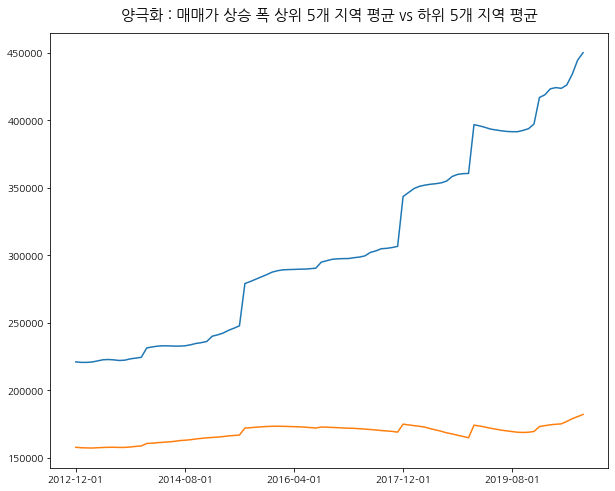

In [77]:
df_change_trend.T[['세종', '제주', '서울', '대구', '광주']].mean(axis = 1).plot(figsize = (10, 8))
df_change_trend.T[['울산', '충북', '충남', '전북', '경남']].mean(axis = 1).plot(figsize = (10, 8))
plt.title("양극화 : 매매가 상승 폭 상위 5개 지역 평균 vs 하위 5개 지역 평균", size = 15, y = 1.02)
plt.show()